In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape
#50000 images, each 32x32, 3 rgb colours

170500096/170498071 [==============================] - 38s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_train.shape

(50000, 1)

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
#converting from 2d array to 1d
y_train = y_train.reshape(-1,)      #-1> first dimension is unchanged, blank> second dimension is dropped
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [16]:
classes[9]

'truck'

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

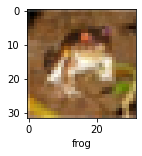

In [18]:
plot_sample(X_train, y_train, 0)

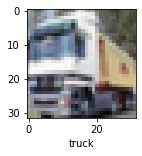

In [19]:
plot_sample(X_train, y_train, 1)

# Normalize data 

In [20]:
#values range from 0-255
X_train = X_train / 255
X_test = X_test / 255

# Simple ANN to compare

In [23]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),       #flatten i/p layer acctepting 32x32x3 image
    layers.Dense(3000, activation='relu'),       #3000 neurons
    layers.Dense(1000, activation='relu'),       #1000 neurons
    layers.Dense(10, activation='sigmoid')       #10 o/p category neurons
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.9290 - accuracy: 0.3032
Epoch 2/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.6433 - accuracy: 0.4177
Epoch 3/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.5558 - accuracy: 0.4491
Epoch 4/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4885 - accuracy: 0.4735
Epoch 5/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4336 - accuracy: 0.4977


In [25]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.47      0.51      1000
           1       0.66      0.54      0.59      1000
           2       0.32      0.46      0.38      1000
           3       0.26      0.56      0.36      1000
           4       0.57      0.23      0.33      1000
           5       0.36      0.38      0.37      1000
           6       0.60      0.41      0.49      1000
           7       0.45      0.67      0.54      1000
           8       0.80      0.35      0.49      1000
           9       0.63      0.45      0.53      1000

    accuracy                           0.45     10000
   macro avg       0.52      0.45      0.46     10000
weighted avg       0.52      0.45      0.46     10000



In [ ]:
#accuracy is precision is quite low

# CNN

In [30]:
cnn = models.Sequential([
    #cnn layers set 1
    layers.Conv2D(filters = 32, activation = 'relu', kernel_size=(3,3), input_shape = (32,32,3)),                             #conv layer, filters are figured out automaticaly
    #32 filters > can detect 32 different features
    #Kernel size > size of filter
    layers.MaxPooling2D(2,2),
    
    #cnn layers set 2
    layers.Conv2D(filters = 32, activation = 'relu', kernel_size=(3,3), input_shape = (32,32,3)),                             
    layers.MaxPooling2D(2,2),
    
    #dense layers
    layers.Flatten(),                            #flatten layer, i/p size figured automaticaly
    layers.Dense(64, activation='relu'),         #need few neurons sinxe conv has done most work
    layers.Dense(10, activation='softmax')       #10 o/p category neurons, softmax: normalizes the probability output
])

In [32]:
cnn.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [33]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 41s 25ms/step - loss: 1.7289 - accuracy: 0.3685
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2244 - accuracy: 0.5670
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0890 - accuracy: 0.6199
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9908 - accuracy: 0.6578
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9185 - accuracy: 0.6824
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8758 - accuracy: 0.6949
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8279 - accuracy: 0.7093
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7822 - accuracy: 0.7277
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7443 - accuracy: 0.74210s - loss: 0.744
Epoch 10/10
1563/1563 [=========================

In [34]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.8991 - accuracy: 0.6961


[0.899124801158905, 0.6960999965667725]

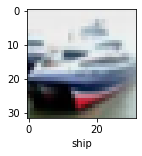

In [35]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [36]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.6053980e-03, 5.0063926e-04, 8.6147888e-03, 5.4808408e-01,
        4.4334922e-03, 3.3799681e-01, 5.7502195e-02, 1.2085753e-02,
        2.1919359e-02, 4.2574694e-03],
       [2.5011590e-05, 6.0957335e-03, 2.0712191e-07, 2.1939040e-06,
        1.9311676e-08, 4.9927160e-09, 6.3819825e-09, 6.0653808e-11,
        9.9384129e-01, 3.5489189e-05],
       [1.0355023e-01, 1.0238977e-01, 8.8358838e-03, 4.6557970e-03,
        1.0369928e-03, 8.1187580e-04, 5.0308456e-04, 2.5554016e-04,
        7.6699942e-01, 1.0961390e-02],
       [5.3445250e-01, 9.6094580e-03, 3.3158991e-02, 2.5890503e-02,
        1.4434049e-03, 1.0073717e-03, 3.7233096e-02, 9.6856238e-05,
        3.5525978e-01, 1.8480957e-03],
       [1.1096424e-05, 2.5579450e-04, 5.3203210e-02, 2.1724874e-02,
        1.8408462e-01, 7.3105772e-03, 7.3238713e-01, 1.6270231e-05,
        9.9417532e-04, 1.2297964e-05]], dtype=float32)

In [40]:
#argmax gives index of highest value
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [39]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

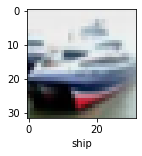

In [41]:
plot_sample(X_test, y_test, 1)

In [42]:
classes[y_classes[1]]

'ship'

In [43]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.74      0.73      1000
           1       0.81      0.80      0.80      1000
           2       0.59      0.57      0.58      1000
           3       0.53      0.47      0.50      1000
           4       0.71      0.59      0.65      1000
           5       0.61      0.58      0.59      1000
           6       0.67      0.86      0.75      1000
           7       0.73      0.78      0.75      1000
           8       0.78      0.82      0.80      1000
           9       0.79      0.74      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.69      0.70      0.69     10000
weighted avg       0.69      0.70      0.69     10000

